In [1]:
import sys
import os
from os.path import join, abspath, exists
root = abspath(join(os.getcwd(), '../..'))
if root not in sys.path:
    sys.path.append(root)

In [74]:
%load_ext autoreload
%autoreload 2

from riskformer.data.datasets import create_riskformer_dataset
from riskformer.utils.config_utils import load_preprocessing_config, load_train_config
from riskformer.utils.logger_config import logger_setup, log_event

train_config = load_train_config(join(root, "configs/training/ec2_config.yaml"))
if train_config:
    print(train_config)
    max_dim = train_config["prep"]["max_dim"]
    overlap = train_config["prep"]["overlap"]
else:
    max_dim = 32
    overlap = 0.0

logger_setup(
    "notebooks-datasets",
    log_dir=join(root, "logs"),
    debug=False)

dataset_metadata = join(root, "resources/riskformer_slide_samples.json")
prep_config_path = join(root, "configs/preprocessing/ec2_config.yaml")
prep_config = load_preprocessing_config(prep_config_path)

dataset = create_riskformer_dataset(
    s3_bucket=prep_config["s3"]["data_bucket"],
    s3_prefix=join(prep_config["s3"]["output_dir"], prep_config["model"]["key"]),
    max_dim=max_dim,
    overlap=overlap,
    metadata_file=dataset_metadata,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1
/home/ec2-user/brca_riskformer/logs


[03/07/25 05:35:58] INFO     Logger already configured, skipping setup.                         ]8;id=801252;file:///home/ec2-user/brca_riskformer/riskformer/utils/logger_config.py\logger_config.py]8;;\:]8;id=419788;file:///home/ec2-user/brca_riskformer/riskformer/utils/logger_config.py#80\80]8;;\

                    INFO     Loading cached SSO token for mgb                                         ]8;id=405324;file:///opt/conda/envs/pytorch/lib/python3.11/site-packages/botocore/tokens.py\tokens.py]8;;\:]8;id=417136;file:///opt/conda/envs/pytorch/lib/python3.11/site-packages/botocore/tokens.py#305\305]8;;\

[03/07/25 05:35:59] INFO     SSO Token refresh succeeded                                              ]8;id=734435;file:///opt/conda/envs/pytorch/lib/python3.11/site-packages/botocore/tokens.py\tokens.py]8;;\:]8;id=572080;file:///opt/conda/envs/pytorch/lib/python3.11/site-packages/botocore/tokens.py#275\275]8;;\

                    INFO     {"event":"load_metadata","status":"success","timestamp":"2025-03- ]8;id=50413;file:///home/ec2-user/brca_riskformer/riskformer/utils/logger_config.py\logger_config.py]8;;\:]8;id=737039;file:///home/ec2-user/brca_riskformer/riskformer/utils/logger_config.py#178\178]8;;\
                             07T05:35:59.570870","total_slides":1099}                                              

[03/07/25 05:36:00] INFO     {"event":"find_complete_slide_sets","status":"success","timestamp ]8;id=303324;file:///home/ec2-user/brca_riskformer/riskformer/utils/logger_config.py\logger_config.py]8;;\:]8;id=720097;file:///home/ec2-user/brca_riskformer/riskformer/utils/logger_config.py#178\178]8;;\
                             ":"2025-03-07T05:36:00.131896","total_files":208,"total_slides_in                     
                             _metadata":1099,"preprocessed_slides_found":52,"missing_slides":1                     
                             047}                                                                                  

                    INFO     {"event":"create_riskformer_dataset","status":"success","timestam ]8;id=225896;file:///home/ec2-user/brca_riskformer/riskformer/utils/logger_config.py\logger_config.py]8;;\:]8;id=304789;file:///home/ec2-user/brca_riskformer/riskformer/utils/logger_config.py#178\178]8;;\
                             p":"2025-03-07T05:36:00.139718","slide_count":50,"feature_dim":15                     
                             36,"cache_dir":"/tmp/riskformer_cache"}                                               

In [115]:
xl_patches, xl_patch_info, id, labels, dense_features = dataset[1]

print("test_data:")
print(f"Slide ID: {id}")
for k,v in labels.items():
    print(f"\t{k}: {v}")
print(f"Test example shape: {xl_patches.shape}")





test_data:
Slide ID: TCGA-3C-AALJ
	coords_paths: ['s3://tcga-riskformer-data-2025/preprocessed/uni/uni2-h/TCGA-3C-AALJ-01Z-00-DX1.777C0957-255A-42F0-9EEB-A3606BCF0C96_coords.h5', 's3://tcga-riskformer-data-2025/preprocessed/uni/uni2-h/TCGA-3C-AALJ-01Z-00-DX2.62DFE56B-B84C-40F9-9625-FCB55767B70D_coords.h5']
	features_paths: ['s3://tcga-riskformer-data-2025/preprocessed/uni/uni2-h/TCGA-3C-AALJ-01Z-00-DX1.777C0957-255A-42F0-9EEB-A3606BCF0C96_features.h5', 's3://tcga-riskformer-data-2025/preprocessed/uni/uni2-h/TCGA-3C-AALJ-01Z-00-DX2.62DFE56B-B84C-40F9-9625-FCB55767B70D_features.h5']
	odx_train: 0.9376
	odx85: 1
	mphr: 1
	dfm: 48.43987146
	necrosis: 0
	pleo: 3
Test example shape: torch.Size([74, 32, 32, 1536])


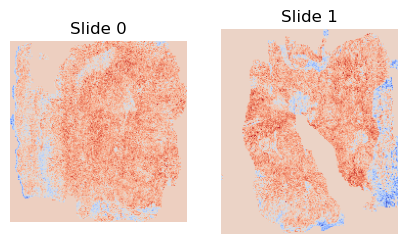

In [130]:
import matplotlib.pyplot as plt
from riskformer.utils.training_utils import rearrange_xl_patches

reconstructed_features = rearrange_xl_patches(xl_patches, xl_patch_info.cpu().numpy())

n = len(reconstructed_features)
f, ax = plt.subplots(1, n, figsize=(5, 5 * n))
for i, feature in enumerate(reconstructed_features):
    ax[i].imshow(feature.cpu().numpy()[..., 0], cmap='coolwarm')
    ax[i].axis('off')
    ax[i].set_title(f"Slide {i}")
plt.show()